In [2]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Figures for paper, no extra files needed

In [2]:
# asteroid props
m_a = 5.0E9  #kg
R_a = 80.  # m
G = 6.67e-11
g_a = G*m_a/R_a**2
print('g_a {:.1e} m s2'.format(g_a))
v_escape = np.sqrt(2*G*m_a/R_a)
print('v_escape {:.3f} m/s'.format(v_escape))

g_a 5.2e-05 m s2
v_escape 0.091 m/s


In [3]:
rho_s = 2.0e3  #kg/m3
m_p = 550.0 # kg
v_impact = 6.5e3  # km to m
K_impact = 0.5*v_impact**2*m_p
print('Kimpact {:.1e} J'.format(K_impact))
print('mv_impact {:.1e} kg m/s'.format(m_p*v_impact))

R_crater = 10.0 # m
k_seis = 1e-3
#c_g = 3000.  # rock props
E_g = 1e10  #Pa
Dfac = 1e3 # this is C_W^2 d_g in m

Kimpact 1.2e+10 J
mv_impact 3.6e+06 kg m/s


In [4]:
# compute values at R_crater
def Cr_vals(K_impact,k_seis,E_g,rho_s,R_crater,fixvp,printit):
    c_g = np.sqrt(E_g/rho_s)
    vpk_Cr = np.sqrt(k_seis*K_impact/(2*np.pi * R_crater**3 * rho_s))
    if (fixvp >0):
        v_P_Cr = fixvp
        Ppk_Cr = rho_s*v_P_Cr*vpk_Cr
    else:
        Ppk_Cr = (rho_s*vpk_Cr*c_g)**(6.0/5.0) * E_g**(-1.0/5.0) 
        v_P_Cr = c_g * (Ppk_Cr/E_g)**(1.0/6.0)
    Deltat_v_Cr = R_crater/v_P_Cr
    apk_Cr = vpk_Cr/Deltat_v_Cr
    dpk_Cr = vpk_Cr*Deltat_v_Cr
    beta_eff = 1.
    vpk2_Cr = beta_eff*m_p*v_impact/(rho_s*2*np.pi*R_crater**3)
    if (printit==1):
        print('')
        print('c_g = {:.2f}  m/s'.format(c_g))
        print('vpk_Cr {:.2f} m/s'.format(vpk_Cr))
        print('vpk2_Cr= {:.2f} m/s'.format(vpk2_Cr))
        print('Ppk_Cr =  {:.0f} kPa'.format(Ppk_Cr/1e3))
        print('v_P_Cr =  {:.0f} m/s'.format(v_P_Cr))
        print('Deltat_v_Cr = {:.0f} ms'.format(Deltat_v_Cr *1e3))
        print('a_pk_Cr =  {:.0f} m/s2'.format(apk_Cr))
        print('delta_pk_Cr =  {:.3f} m'.format(dpk_Cr))
    return vpk_Cr,c_g,Ppk_Cr,v_P_Cr,Deltat_v_Cr,apk_Cr,dpk_Cr,vpk2_Cr
    

# if you know  Delta t, r, compute some quantities at r
# requires: c_g, E_g, rho_s, R_crater, Ppk_Cr, Deltat_v_Cr
def pk_fun(dt,r,c_g,E_g,rho_s,R_crater,Ppk_Cr,Deltat_v_Cr,fixvp):
    Ppk = Ppk_Cr * (r/R_crater)**-2 * (dt/Deltat_v_Cr)**-1
    if (fixvp > 0):
        v_P = fixvp
    else:
        v_P =  c_g * (Ppk/E_g)**(1.0/6.0)
    vpk = Ppk/(rho_s*v_P)
    apk = vpk/dt
    dpk = vpk*dt
    return Ppk,v_P,apk,vpk,dpk

In [5]:
# compute values at R_crater
fixvp = 0
vpk_Cr,c_g,Ppk_Cr,v_P_Cr,Deltat_v_Cr,apk_Cr,dpk_Cr,vpk2_Cr = Cr_vals(K_impact,k_seis,E_g,rho_s,R_crater,fixvp,1)
fixvp = 100
vpk_Cr,c_g,Ppk_Cr,v_P_Cr,Deltat_v_Cr,apk_Cr,dpk_Cr,vpk2_Cr = Cr_vals(K_impact,k_seis,E_g,rho_s,R_crater,fixvp,1)


c_g = 2236.07  m/s
vpk_Cr 0.96 m/s
vpk2_Cr= 0.28 m/s
Ppk_Cr =  912 kPa
v_P_Cr =  474 m/s
Deltat_v_Cr = 21 ms
a_pk_Cr =  46 m/s2
delta_pk_Cr =  0.020 m

c_g = 2236.07  m/s
vpk_Cr 0.96 m/s
vpk2_Cr= 0.28 m/s
Ppk_Cr =  192 kPa
v_P_Cr =  100 m/s
Deltat_v_Cr = 100 ms
a_pk_Cr =  10 m/s2
delta_pk_Cr =  0.096 m



c_g = 2236.07  m/s
vpk_Cr 0.96 m/s
vpk2_Cr= 0.28 m/s
Ppk_Cr =  912 kPa
v_P_Cr =  474 m/s
Deltat_v_Cr = 21 ms
a_pk_Cr =  46 m/s2
delta_pk_Cr =  0.020 m


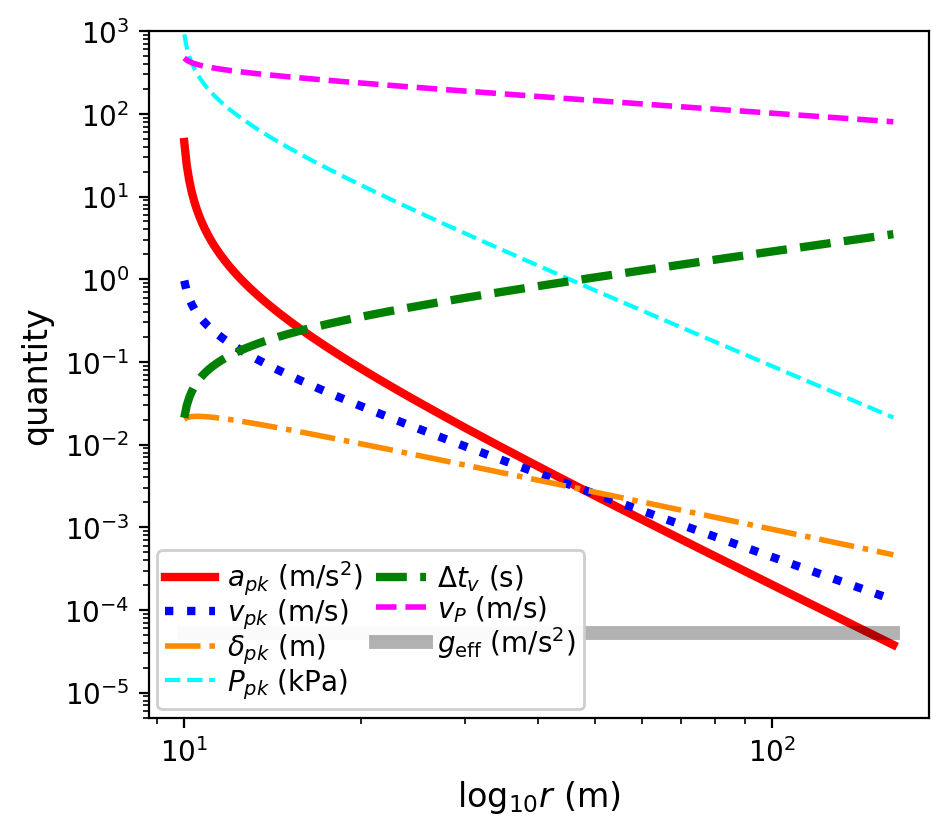

In [23]:
def compute_arrs(K_impact,k_seis,E_g,rho_s,R_crater,Dfac,fixvp,dr0):
    vpk_Cr,c_g,Ppk_Cr,v_P_Cr,Deltat_v_Cr,apk_Cr,dpk_Cr,vpk2_Cr = \
        Cr_vals(K_impact,k_seis,E_g,rho_s,R_crater,fixvp,1)
    
    vpk_arr = np.array([vpk_Cr])
    apk_arr = np.array([apk_Cr])
    dpk_arr = np.array([dpk_Cr])

    r = R_crater
    r_arr = np.array([r])
    dr = dr0
    
    Ppk = Ppk_Cr
    v_P = v_P_Cr
    dt2 = Deltat_v_Cr**2
    Ppk_arr = np.array([Ppk])
    v_P_arr = np.array([v_P])
    dt2_arr = np.array([dt2])
    
    while (r < 2*R_a):
        r += dr
        r_arr = np.append(r_arr,r)
        D = Dfac * v_P
        #print(dt2,D*dr/v_P**3)
        dt2 +=  D*dr/v_P**3 
        dt2_arr = np.append(dt2_arr,dt2)
        dt = np.sqrt(dt2)
        Ppk,v_P,apk,vpk,dpk = pk_fun(dt,r,c_g,E_g,rho_s,R_crater,Ppk_Cr,Deltat_v_Cr,fixvp)
        v_P_arr = np.append(v_P_arr,v_P)
        vpk_arr = np.append(vpk_arr,vpk)
        apk_arr = np.append(apk_arr,apk)
        dpk_arr = np.append(dpk_arr,dpk)
        Ppk_arr = np.append(Ppk_arr,Ppk)
        dr*=1.01
    
    dt_arr = np.sqrt(dt2_arr)
    return r_arr,v_P_arr,Ppk_arr,vpk_arr,apk_arr,dpk_arr,dt_arr 

fixvp = 0;
dr0 = R_crater/100
r_arr,v_P_arr,Ppk_arr,vpk_arr,apk_arr,dpk_arr,dt_arr= \
            compute_arrs(K_impact,k_seis,E_g,rho_s,R_crater,Dfac,fixvp,dr0)

fig,ax = plt.subplots(1,1,figsize=(5,4.4),dpi=200)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2, left=0.2,right=0.98)

ax.plot(r_arr,apk_arr,'-',label=r'$a_{pk}$ (m/s$^2$)',color='red',lw=3)
ax.plot(r_arr,vpk_arr,':',label=r'$v_{pk}$ (m/s)',color='blue', lw=3)
ax.plot(r_arr,dpk_arr,'-.',label=r'$\delta_{pk}$ (m)',color='darkorange',lw=2)
ax.plot(r_arr,Ppk_arr/1e3,'--',label=r'$P_{pk}$ (kPa)',color='cyan')
ax.plot(r_arr,dt_arr,'--',label=r'$\Delta t_v$ (s)',color='green',lw=3)
ax.plot(r_arr,v_P_arr,'--',label=r'$v_P$ (m/s)',color='magenta',lw=2)
ax.set_xlabel(r'log$_{10}r$ (m)',fontsize=12)
ax.set_ylabel(r'quantity',fontsize=12)
#ax.plot(r_arr,r_arr*0 + g_a,':',label=r'$g_{\rm eff}$',color='cyan')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([5e-6,1e3])
ax.plot(r_arr,r_arr*0 + g_a,'-',label=r'$g_{\rm eff}$ (m/s$^2$)',color='black',lw=5,alpha=0.3)
plt.legend(borderpad=0.3,labelspacing=0.0,handlelength=1.8,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5,loc='lower left',framealpha=0.95)

plt.savefig('DART_quants.png')

In [ ]:
#I don't understand why the Delta tv goes up fast at the beginning,
#It should be a constants at the beginning


c_g = 707.11  m/s
vpk_Cr 0.96 m/s
vpk2_Cr= 0.28 m/s
Ppk_Cr =  363 kPa
v_P_Cr =  189 m/s
Deltat_v_Cr = 53 ms
a_pk_Cr =  18 m/s2
delta_pk_Cr =  0.051 m

c_g = 2236.07  m/s
vpk_Cr 0.96 m/s
vpk2_Cr= 0.28 m/s
Ppk_Cr =  912 kPa
v_P_Cr =  474 m/s
Deltat_v_Cr = 21 ms
a_pk_Cr =  46 m/s2
delta_pk_Cr =  0.020 m

c_g = 2236.07  m/s
vpk_Cr 0.10 m/s
vpk2_Cr= 0.28 m/s
Ppk_Cr =  58 kPa
v_P_Cr =  299 m/s
Deltat_v_Cr = 33 ms
a_pk_Cr =  3 m/s2
delta_pk_Cr =  0.003 m

c_g = 2236.07  m/s
vpk_Cr 2.72 m/s
vpk2_Cr= 2.28 m/s
Ppk_Cr =  3177 kPa
v_P_Cr =  584 m/s
Deltat_v_Cr = 9 ms
a_pk_Cr =  318 m/s2
delta_pk_Cr =  0.023 m

c_g = 2236.07  m/s
vpk_Cr 0.34 m/s
vpk2_Cr= 0.04 m/s
Ppk_Cr =  262 kPa
v_P_Cr =  385 m/s
Deltat_v_Cr = 52 ms
a_pk_Cr =  7 m/s2
delta_pk_Cr =  0.018 m

c_g = 2236.07  m/s
vpk_Cr 0.96 m/s
vpk2_Cr= 0.28 m/s
Ppk_Cr =  192 kPa
v_P_Cr =  100 m/s
Deltat_v_Cr = 100 ms
a_pk_Cr =  10 m/s2
delta_pk_Cr =  0.096 m


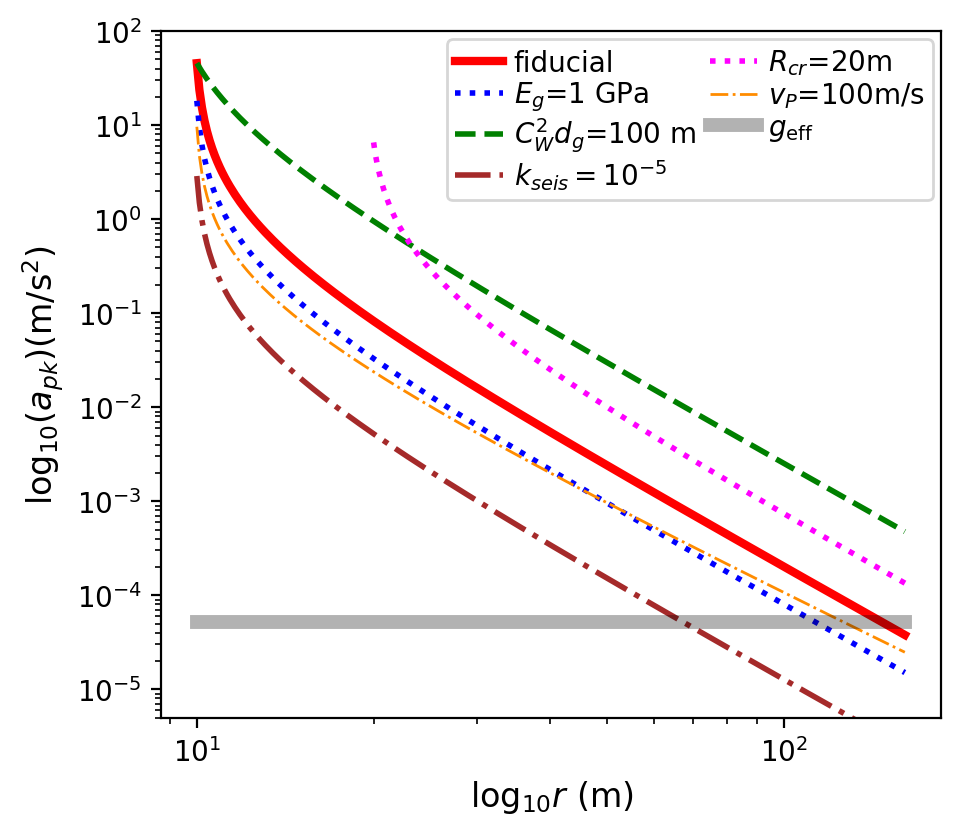

In [21]:
r_arr_b,v_P_arr_b,Ppk_arr_b,vpk_arr_b,apk_arr_b,dpk_arr_b,dt_arr_b  = \
    compute_arrs(K_impact,k_seis,E_g/10,rho_s,R_crater,Dfac,fixvp,dr0)
r_arr_c,v_P_arr_c,Ppk_arr_c,vpk_arr_c,apk_arr_c,dpk_arr_c,dt_arr_c  = \
    compute_arrs(K_impact,k_seis,E_g,rho_s,R_crater,Dfac/10,fixvp,dr0)
r_arr_d,v_P_arr_d,Ppk_arr_d,vpk_arr_d,apk_arr_d,dpk_arr_d,dt_arr_d  = \
    compute_arrs(K_impact,k_seis/100,E_g,rho_s,R_crater,Dfac,fixvp,dr0)
r_arr_e,v_P_arr_e,Ppk_arr_e,vpk_arr_e,apk_arr_e,dpk_arr_e,dt_arr_e  = \
    compute_arrs(K_impact,k_seis,E_g,rho_s,R_crater/2,Dfac,fixvp,dr0)
r_arr_f,v_P_arr_f,Ppk_arr_f,vpk_arr_f,apk_arr_f,dpk_arr_f,dt_arr_f  = \
    compute_arrs(K_impact,k_seis,E_g,rho_s,R_crater*2,Dfac,fixvp,dr0)
r_arr_g,v_P_arr_g,Ppk_arr_g,vpk_arr_g,apk_arr_g,dpk_arr_g,dt_arr_g  = \
    compute_arrs(K_impact,k_seis,E_g,rho_s,R_crater,Dfac,100.,dr0)



fig,ax = plt.subplots(1,1,figsize=(5,4.4),dpi=200)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2, left=0.2,right=0.98)

ax.plot(r_arr,apk_arr,'-',label=r'fiducial',color='red',lw=3)
ax.plot(r_arr_b,apk_arr_b,':',label=r'$E_g$=1 GPa',color='blue',lw=2)
ax.plot(r_arr_c,apk_arr_c,'--',label=r'$C_W^2 d_g$=100 m',color='green',lw=2)
ax.plot(r_arr_d,apk_arr_d,'-.',label=r'$k_{seis}=10^{-5}$',color='brown',lw=2)
#ax.plot(r_arr_e,apk_arr_e,':',label=r'$R_{cr}$=5m',color='magenta',lw=1)
ax.plot(r_arr_f,apk_arr_f,':',label=r'$R_{cr}$=20m',color='magenta',lw=2)
ax.plot(r_arr_g,apk_arr_g,'-.',label=r'$v_P$=100m/s',color='darkorange',lw=1)

ax.set_xlabel(r'log$_{10}r$ (m)',fontsize=12)
ax.set_ylabel(r'log$_{10}(a_{pk})$' + r'(m/s$^2$)',fontsize=12)
#ax.plot(r_arr,r_arr*0 + g_a,':',label=r'$g_{\rm eff}$',color='cyan')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([5e-6,1e2])
ax.plot(r_arr_d,r_arr_d*0 + g_a,'-',label=r'$g_{\rm eff}$',color='black',lw=5,alpha=0.3)
plt.legend(borderpad=0.3,labelspacing=0.1,handlelength=1.7,handletextpad=0.4,borderaxespad=0.3,\
           ncol=2,columnspacing=0.5,loc='upper right')


plt.savefig('DART_ac.png')

In [85]:
#  need a new figure!
nchannels=7
# set up the coordinate templates
Rcoords_R5 = np.zeros(nchannels) + 0.055
zcoords_R5 = -(np.arange(nchannels)*3. + 4.0)/100
dphi = 20.; pcoords_R5 = np.arange(nchannels)*dphi - 3*dphi
xcoords_R5 = Rcoords_R5*np.cos(pcoords_R5*np.pi/180)
ycoords_R5 = Rcoords_R5*np.sin(pcoords_R5*np.pi/180)
print('z=',zcoords_R5)
print('R=',Rcoords_R5)
print('f=',pcoords_R5)
#ds_R5.set_coords(Rcoords_R5,zcoords_R5)

Rcoords_R10 = np.zeros(nchannels) + 0.105
zcoords_R10 = -(np.arange(nchannels)*3. + 4.0)/100
dphi = 15.; pcoords_R10 = np.arange(nchannels)*dphi - 3*dphi
xcoords_R10 = Rcoords_R10*np.cos(pcoords_R10*np.pi/180)
ycoords_R10 = Rcoords_R10*np.sin(pcoords_R10*np.pi/180)
print('z=',zcoords_R10)
print('R=',Rcoords_R10)
print('f=',pcoords_R10)
#ds_R10.set_coords(Rcoords_R10,zcoords_R10)

Rcoords_R15 = np.zeros(nchannels) + 0.155
zcoords_R15 = -(np.arange(nchannels)*3. + 4.0)/100
dphi = 15.; pcoords_R15 = np.arange(nchannels)*dphi - 3*dphi
xcoords_R15 = Rcoords_R15*np.cos(pcoords_R15*np.pi/180)
ycoords_R15 = Rcoords_R15*np.sin(pcoords_R15*np.pi/180)
print('z=',zcoords_R15)
print('R=',Rcoords_R15)
#ds_R15.set_coords(Rcoords_R15,zcoords_R15)

Rcoords_L5 =  (np.arange(nchannels)*3. + 5.0)/100
#Rcoords_L5[0] += 0.5/100  # do you want this or not?
zcoords_L5 =  np.zeros(nchannels)  - 0.05
pcoords_L5 = np.zeros(nchannels)
xcoords_L5 = Rcoords_L5*np.cos(pcoords_L5*np.pi/180)
ycoords_L5 = Rcoords_L5*np.sin(pcoords_L5*np.pi/180)
print('z=',zcoords_L5)
print('R=',Rcoords_L5)
#ds_L5.set_coords(Rcoords_L5,zcoords_L5)
#ds_SL5.set_coords(Rcoords_L5,zcoords_L5)
#ds_SL5_2.set_coords(Rcoords_L5,zcoords_L5)

Rcoords_L10 =  (np.arange(nchannels)*3. + 2.0)/100
zcoords_L10 =   np.zeros(nchannels)  - 0.10
pcoords_L10 = np.zeros(nchannels)
xcoords_L10 = Rcoords_L10*np.cos(pcoords_L10*np.pi/180)
ycoords_L10 = Rcoords_L10*np.sin(pcoords_L10*np.pi/180)
print('z=',zcoords_L10)
print('R=',Rcoords_L10)
#ds_L10.set_coords(Rcoords_L10,zcoords_L10)

Rcoords_L15 =  (np.arange(nchannels)*3. + 2.0)/100
zcoords_L15 =   np.zeros(nchannels)  - 0.15
pcoords_L15 = np.zeros(nchannels)
xcoords_L15 = Rcoords_L15*np.cos(pcoords_L15*np.pi/180)
ycoords_L15 = Rcoords_L15*np.sin(pcoords_L15*np.pi/180)
print('z=',zcoords_L15)
print('R=',Rcoords_L15)
#ds_L15.set_coords(Rcoords_L15,zcoords_L15)

z= [-0.04 -0.07 -0.1  -0.13 -0.16 -0.19 -0.22]
R= [0.055 0.055 0.055 0.055 0.055 0.055 0.055]
f= [-60. -40. -20.   0.  20.  40.  60.]
z= [-0.04 -0.07 -0.1  -0.13 -0.16 -0.19 -0.22]
R= [0.105 0.105 0.105 0.105 0.105 0.105 0.105]
f= [-45. -30. -15.   0.  15.  30.  45.]
z= [-0.04 -0.07 -0.1  -0.13 -0.16 -0.19 -0.22]
R= [0.155 0.155 0.155 0.155 0.155 0.155 0.155]
z= [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
R= [0.05 0.08 0.11 0.14 0.17 0.2  0.23]
z= [-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
R= [0.02 0.05 0.08 0.11 0.14 0.17 0.2 ]
z= [-0.15 -0.15 -0.15 -0.15 -0.15 -0.15 -0.15]
R= [0.02 0.05 0.08 0.11 0.14 0.17 0.2 ]


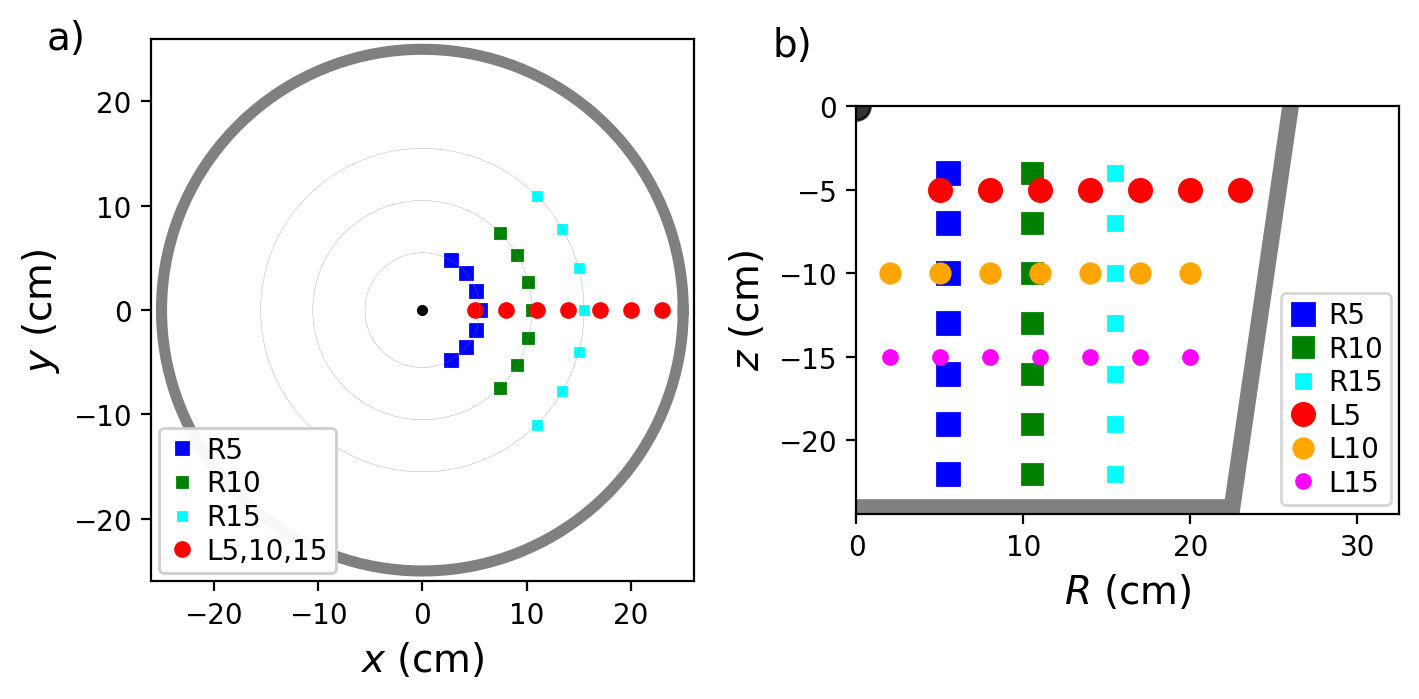

In [86]:
fig,axarr = plt.subplots(1,2,figsize=(8,4.4),dpi=200)
plt.subplots_adjust(hspace=0.1,wspace=0.3,top=0.98, bottom=0.2, left=0.2,right=0.98)

colorlist = ['blue','green','cyan','red','orange','magenta','brown','brown']
mlabellist = ['R5','R10','R15','L5','L10','L15']
axarr[0].set_xlabel(r'$x$ (cm)',fontsize=14)
axarr[0].set_ylabel(r'$y$ (cm)',fontsize=14)
axarr[0].set_aspect('equal')
axarr[0].set_xlim([-26,26])
axarr[0].set_ylim([-26,26])
axarr[0].plot(100*xcoords_R5 ,100*ycoords_R5 ,'s',color=colorlist[0],label=mlabellist[0],ms=4)
axarr[0].plot(100*xcoords_R10,100*ycoords_R10,'s',color=colorlist[1],label=mlabellist[1],ms=3.5)
axarr[0].plot(100*xcoords_R15,100*ycoords_R15,'s',color=colorlist[2],label=mlabellist[2],ms=3)
axarr[0].plot(100*xcoords_L5 ,100*ycoords_L5 ,'o',color=colorlist[3],label='L5,10,15',ms=5)
#axarr[0].plot(100*xcoords_L10,100*ycoords_L10,'o',color=colorlist[4],label=mlabellist[4])
#axarr[0].plot(100*xcoords_L15,100*ycoords_L15,'o',color=colorlist[5],label=mlabellist[5])
axarr[0].plot(0,0,'k.')
angle = np.linspace( 0 , 2 * np.pi , 150 ) 
radius = 25.0;  x = radius*np.cos(angle);  y = radius*np.sin(angle) 
axarr[0].plot(x,y,'-',color='gray',lw=4)
radius = 5.5;  x = radius*np.cos(angle);  y = radius*np.sin(angle) 
axarr[0].plot(x,y,'-',color='gray',lw=0.1)
radius = 10.5;  x = radius*np.cos(angle);  y = radius*np.sin(angle) 
axarr[0].plot(x,y,'-',color='gray',lw=0.1)
radius = 15.5;  x = radius*np.cos(angle);  y = radius*np.sin(angle) 
axarr[0].plot(x,y,'-',color='gray',lw=0.1)
axarr[0].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4,loc='lower left',framealpha=0.95)
axarr[0].text(-36,25,'a)',fontsize=14)

axarr[1].set_xlabel(r'$R$ (cm)',fontsize=14)
axarr[1].set_ylabel(r'$z$ (cm)',fontsize=14)
axarr[1].set_aspect('equal')
axarr[1].plot(100*Rcoords_R5 ,100*zcoords_R5 ,'s',color=colorlist[0],label=mlabellist[0],ms=8)
axarr[1].plot(100*Rcoords_R10,100*zcoords_R10,'s',color=colorlist[1],label=mlabellist[1],ms=7)
axarr[1].plot(100*Rcoords_R15,100*zcoords_R15,'s',color=colorlist[2],label=mlabellist[2],ms=5)
axarr[1].plot(100*Rcoords_L5 ,100*zcoords_L5 ,'o',color=colorlist[3],label=mlabellist[3],ms=8)
axarr[1].plot(100*Rcoords_L10,100*zcoords_L10,'o',color=colorlist[4],label=mlabellist[4],ms=7)
axarr[1].plot(100*Rcoords_L15,100*zcoords_L15,'o',color=colorlist[5],label=mlabellist[5],ms=5)
axarr[1].set_xlim([0,32.5]);  axarr[1].set_ylim([-24.4,0])
axarr[1].plot([22.5,26],[-24,0],'-',lw=6,color='grey')# tub outline!
axarr[1].plot([0,22.2],[-24,-24],'-',lw=6,color='grey')
axarr[1].legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.4,loc='lower right')
axarr[1].plot([0],[0],'ko',alpha=0.8,ms=10)
axarr[1].text(-5,3,'b)',fontsize=14)
plt.savefig('templates.png')   # new figure!

In [241]:
# yet another figure using data from Yasui+15 and Matsue+20
#run       mp    vimp   R_cr  xcm   tris tmax  gmax  Thalf rhop Vp 
#          g     m/s    cm    cm    ms   ms    m/s2  ms    kg/m3 m/s
junk = np.loadtxt('yasui_matsue.dat',comments='#')
dat_run   = junk[:,0]
dat_mp    = junk[:,1]
dat_vimp  = junk[:,2]
dat_Rcr   = junk[:,3]
dat_xcm   = junk[:,4]
dat_tris  = junk[:,5]
dat_tmax  = junk[:,6]
dat_gmax  = junk[:,7]
dat_Thalf = junk[:,8]
dat_rhop  = junk[:,9]
dat_Vp    = junk[:,10]
T_seis = dat_Rcr*1e-2/dat_Vp*1e3   # in ms
x_over_R = dat_xcm/dat_Rcr

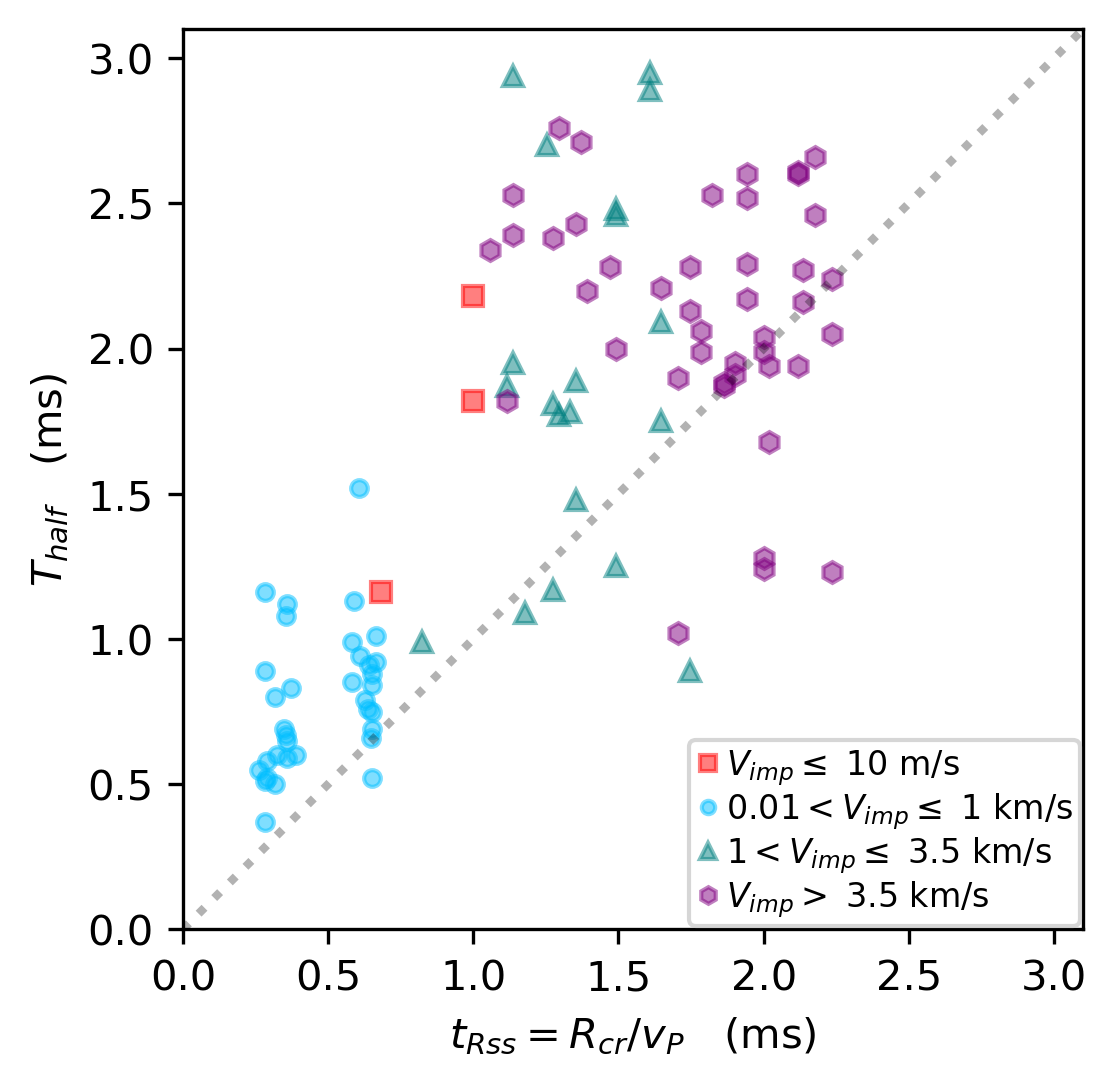

In [248]:
fig,ax = plt.subplots(1,1,figsize=(4,4),dpi=300)
plt.subplots_adjust(hspace=0,wspace=0,top=0.95, bottom=0.2, left=0.2,right=0.98)
ax.set_aspect('equal')
ax.set_xlim([0.,3.1])
ax.set_ylim([0.,3.1])


Rii = (x_over_R >1) & (x_over_R<2.1) 
Dii = (dat_rhop < 1300)
Dii2 = (dat_rhop > 1300)
Exii = True

ii = (dat_vimp<=10)   & Rii & Exii
ax.plot(T_seis[ii], dat_Thalf[ii],'rs', ms=5,alpha=0.5, label=r'$V_{imp} \leq$ 10 m/s ' )
ii = (dat_vimp>10)  & (dat_vimp<=1000) & Rii  & Exii
ax.plot(T_seis[ii], dat_Thalf[ii],'o',ms=4,color='deepskyblue',alpha=0.5,label=r'$0.01 < V_{imp}\leq$ 1 km/s')
ii = (dat_vimp>1000) &  (dat_vimp<=3500) & Rii & Exii
ax.plot(T_seis[ii], dat_Thalf[ii],'^', ms=5, color='teal',alpha=0.5,label=r'$1 < V_{imp}\leq$ 3.5 km/s' )
ii = (dat_vimp>3500)  & Rii & Exii
ax.plot(T_seis[ii], dat_Thalf[ii],'h', ms=5,color='purple',alpha=0.5, label=r'$V_{imp} >$ 3.5 km/s  ' )

plt.legend(borderpad=0.2,labelspacing=0.1,handlelength=0.7,handletextpad=0.2,borderaxespad=0.1,\
           ncol=1,columnspacing=0.1,loc='lower right',markerscale=0.8,fontsize=8)
ax.set_xlabel(r'$t_{Rss} = R_{cr}/v_P$   (ms)')
ax.set_ylabel(r'$T_{half}$   (ms)' )
x = np.linspace(0,3.1,100)
ax.plot(x,x,'k:',alpha=0.3,lw=2)
plt.savefig('TT.png')

Text(0, 0.5, '$T_{half}$ (ms)')

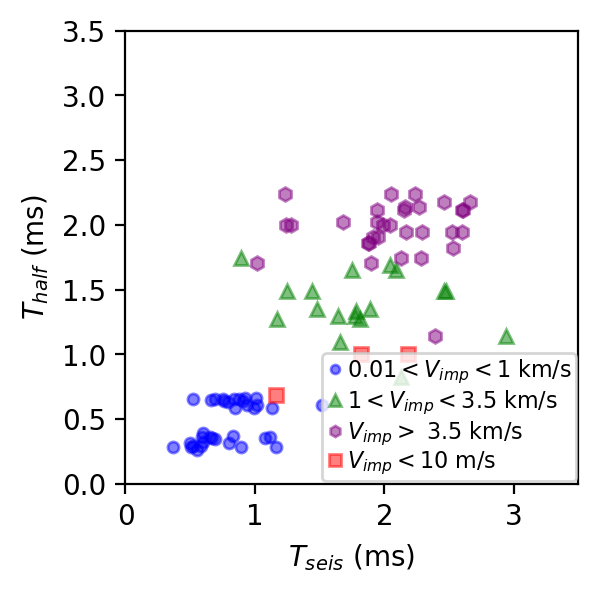

In [198]:
fig,ax = plt.subplots(1,1,figsize=(4,3),dpi=200)
ax.set_aspect('equal')
ax.set_xlim([0.,3.5])
ax.set_ylim([0.,3.5])

Rii = (x_over_R >1) & (x_over_R<2.2) 
Dii = (dat_rhop == 1200)
ii = (dat_vimp>10)  & (dat_vimp<=1000) & Rii
ax.plot( dat_Thalf[ii],T_seis[ii],'o',ms=4,color='blue',alpha=0.5,label=r'$0.01 < V_{imp} < 1$ km/s')
ii = (dat_vimp>1000) &  (dat_vimp<=3500) & Rii
ax.plot(dat_Thalf[ii],T_seis[ii],'^', ms=5, color='green',alpha=0.5,label=r'$1 < V_{imp}< 3.5$ km/s' )
ii = (dat_vimp>3500)  & Rii
ax.plot(dat_Thalf[ii],T_seis[ii],'h', ms=5,color='purple',alpha=0.5, label=r'$V_{imp} >$ 3.5 km/s  ' )
ii = (dat_vimp<=50)   & Rii
ax.plot( dat_Thalf[ii],T_seis[ii],'rs', ms=5,alpha=0.5, label=r'$V_{imp} < 10$ m/s ' )

plt.legend(borderpad=0.2,labelspacing=0.1,handlelength=0.7,handletextpad=0.2,borderaxespad=0.1,\
           ncol=1,columnspacing=0.1,loc='lower right',markerscale=0.8,fontsize=8)
ax.set_xlabel(r'$T_{seis}$ (ms)')
ax.set_ylabel(r'$T_{half}$ (ms)' )

In [49]:
C_W = 1; d_g = 10.
Deltat_v2 = C_W*np.sqrt(R_crater*d_g)/v_P
print('Delta tv2 = {:.0f} ms'.format(Deltat_v2 *1e3))


Delta tv2 = 15 ms


In [31]:
# make exponents 

def mkexps(beta_D,alpha_P):
    denom = 2.0 + beta_D - 2*alpha_P
    gamma_vP = -5*alpha_P/denom
    gamma_Ppk = -5.0/denom
    gamma_tprop = (2.0 +  beta_D + 3*alpha_P)/denom
    gamma_dtv  = 0.5 - 2.5*(beta_D - 2*alpha_P)/denom
    gamma_Wv = 0.5 + (-2.0 - 3.5*beta_D + 2*alpha_P)/denom
    gamma_vpk = -5.0*(1 - alpha_P)/denom
    gamma_apk = (-5.0 + 2.5*beta_D)/denom - 0.5
    gamma_EJ =  (-10.0 + 10*alpha_P - 5.2*beta_D)/denom + 2.5
    gamma_delta = (-4.0  -2*beta_D + alpha_P)/denom
    print('{:.2f} {:.2f} {:.2f}  {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(\
            gamma_vP,gamma_Ppk,gamma_tprop,gamma_dtv,gamma_Wv,gamma_vpk,gamma_apk,gamma_EJ,gamma_delta))
    return gamma_vP,gamma_Ppk,gamma_tprop,gamma_dtv,gamma_Wv,gamma_vpk,gamma_apk,gamma_EJ,gamma_delta  

g_lab0 = r'$\beta_D=0$,$\alpha_P$=0'
print('g_vP  g_Ppk g_tprp g_dt g_Wv g_vpk g_apk g_EJ g_delta')
gamma_vP0,gamma_Ppk0,gamma_tprop0,gamma_dtv0,gamma_Wv0,gamma_vpk0,gamma_apk0,gamma_EJ0,gamma_delta0 = mkexps(0,0)
beta_D = 0.0;  alpha_P = 1.0/6.0; g_lab1 = r'$\beta_D=0$,$\alpha_P$=$\frac{1}{6}$'
gamma_vP,gamma_Ppk,gamma_tprop,gamma_dtv,gamma_Wv,gamma_vpk,gamma_apk,gamma_EJ,gamma_delta = mkexps(beta_D,alpha_P)

beta_D = 0.5;  alpha_P = 1.0/6.0; g_lab2 = r'$\beta_D$=$\frac{1}{2}$,$\alpha_P$=$\frac{1}{6}$'
gamma_vP2,gamma_Ppk2,gamma_tprop2,gamma_dtv2,gamma_Wv2,gamma_vpk2,gamma_apk2,gamma_EJ2,gamma_delta2 = mkexps(beta_D,alpha_P)

print('')
print('vP   {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_vP0   ,gamma_vP   ,gamma_vP2))
print('Ppk  {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_Ppk0  ,gamma_Ppk  ,gamma_Ppk2))
print('tpro {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_tprop0,gamma_tprop,gamma_tprop2))
print('dt   {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_dtv0  ,gamma_dtv  ,gamma_dtv2))
print('W    {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_Wv0   ,gamma_Wv   ,gamma_Wv2))
print('vpk  {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_vpk0  ,gamma_vpk  ,gamma_vpk2))
print('apk  {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_apk0  ,gamma_apk  ,gamma_apk2))
print('dpk   {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_delta0   ,gamma_delta   ,gamma_delta2))
print('EJ   {:5.2f} & {:5.2f} & {:5.2f}'.format(gamma_EJ0   ,gamma_EJ   ,gamma_EJ2))

g_vP  g_Ppk g_tprp g_dt g_Wv g_vpk g_apk g_EJ g_delta
0.00 -2.50 1.00  0.50 -0.50 -2.50 -3.00 -2.50 -2.00
-0.50 -3.00 1.50  1.00 -0.50 -2.50 -3.50 -2.50 -2.30
-0.38 -2.31 1.38  0.31 -1.08 -1.92 -2.23 -2.55 -2.23

vP    0.00 & -0.50 & -0.38
Ppk  -2.50 & -3.00 & -2.31
tpro  1.00 &  1.50 &  1.38
dt    0.50 &  1.00 &  0.31
W    -0.50 & -0.50 & -1.08
vpk  -2.50 & -2.50 & -1.92
apk  -3.00 & -3.50 & -2.23
dpk   -2.00 & -2.30 & -2.23
EJ   -2.50 & -2.50 & -2.55


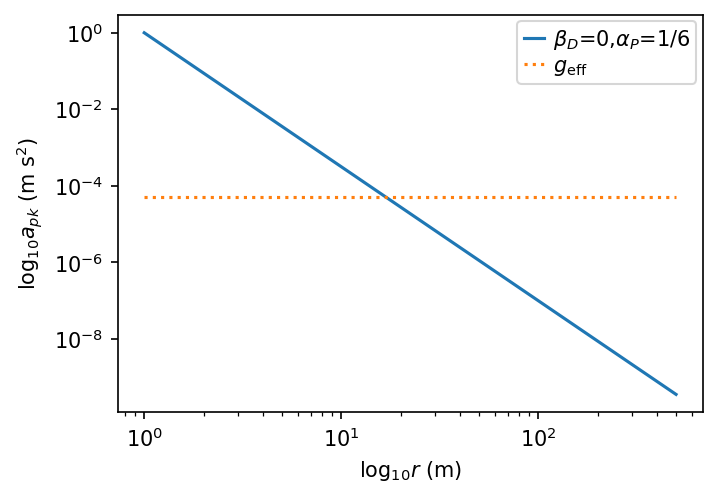

In [40]:
xvec = np.linspace(1.,500,300)
fig,ax = plt.subplots(1,1,figsize=(5,3.4),dpi=150)
plt.subplots_adjust(hspace=0,wspace=0,top=0.98, bottom=0.2, left=0.2,right=0.98)
yvec1 = xvec**gamma_apk
slabel1 = r'$\beta_D$=0,$\alpha_P$=1/6'
ax.plot(xvec,yvec1,'-',label=slabel1)
ax.set_xlabel(r'log$_{10}r$ (m)')
ax.set_ylabel(r'log$_{10} a_{pk}$ (m s$^2$)')
ax.plot(xvec,xvec*0 + g_a,':',label=r'$g_{\rm eff}$')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(borderpad=0.3,labelspacing=0.2,handlelength=1,handletextpad=0.4,borderaxespad=0.3,\
           ncol=1,columnspacing=0.5)

